# Importing Data

Importing the essential modules and the training & testing sets

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
from sklearn.metrics import mean_squared_error
import requests
from bs4 import BeautifulSoup as bs
import re
import itertools
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

[nltk_data] Downloading package punkt to /home/sebastian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sebastian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/sebastian/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [62]:
# setting random seed
np.random.seed(500)

In [63]:
train_df = pd.read_csv('https://raw.githubusercontent.com/stho382/2021_MSA_Submission/main/kaggle_competition/train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/stho382/2021_MSA_Submission/main/kaggle_competition/test.csv')

In [64]:
train_df.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


In [65]:
test_df.head()

,id,url_legal,license,excerpt
0,c0f722661,NaN,NaN,My hope lay in Jack's promise that he would ke...
1,f0953f0a5,NaN,NaN,Dotty continued to go to Mrs. Gray's every nig...
2,0df072751,NaN,NaN,It was a bright and cheerful scene that greete...
3,04caf4e0c,https://en.wikipedia.org/wiki/Cell_division,CC BY-SA 3.0,Cell division is the process by which a parent...
4,0e63f8bea,https://en.wikipedia.org/wiki/Debugging,CC BY-SA 3.0,Debugging is the process of finding and resolv...


In [66]:
train_df.shape

(2834, 6)

# Data Preparation

### _Analysing the datasets_

In [67]:
# describing dataset

train_df.describe()

,target,standard_error
count,2834.000000,2834.000000
mean,-0.959319,0.491435
std,1.033579,0.034818
min,-3.676268,0.000000
25%,-1.690320,0.468543
50%,-0.912190,0.484721
75%,-0.202540,0.506268
max,1.711390,0.649671


<AxesSubplot:>

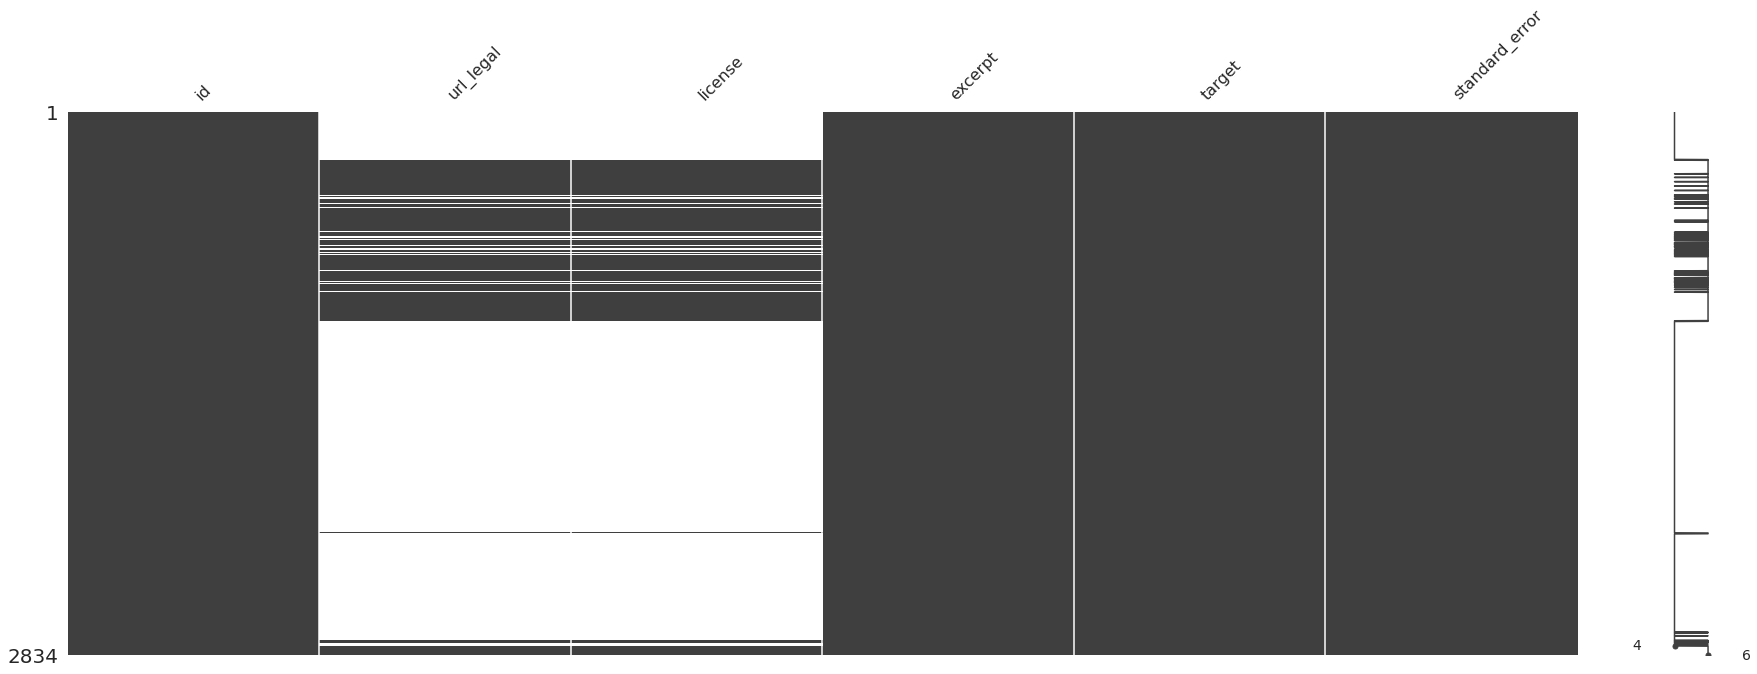

In [68]:
# Analysing the missing within the dataframe

import missingno
missingno.matrix(train_df, figsize=(30, 10))

# No other columns have missing data except url_legal and license

### _Data Preprocessing_



In [69]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess(sentence):
  """
  This function tokenises the sentences into words, removes unnecesary puntuation 
  that may not be useful to the ML model, removes stop words from each paragraph
  and also lemmantises it, dropping similar words.

  Parameters
  ----------
  sentence (string) - the sentence to be pre-processed

  Returns
  ----------
  String containing the pre-processed words

  Notes
  ----------
  References: 
  https://gist.github.com/ameyavilankar/10347201, 
  https://www.geeksforgeeks.org/python-lemmatization-approaches-with-examples/
  """
  
  # Making all sentences lower case
  sentence = sentence.lower()
  
  # tokenising the sentences and removing the punctuation
  tokeniser = RegexpTokenizer(r'\w+')
  tokens = tokeniser.tokenize(sentence)

  # filtering the tokenised words by removing the stopwords
  filtered_words = filter(lambda token: token not in set(stopwords.words('english')), tokens)

  # setting up  WordNetLemmatizer to reduce words to their stems
  wnl = WordNetLemmatizer()
  
  # setting up a set for lemmatised words
  lemmatised_words = set()

  # lemmatize words
  for word in filtered_words:
    if word.isalpha() == True:
      # Only if the words are alphabets, lemmatize the words
      lemmatised_words.add(wnl.lemmatize(word))

  return ' '.join(lemmatised_words)

# testing the function
sentence = train_df['excerpt'][0]
print(preprocess(sentence))

reaching branch decidedly skin young changed appearance rumpled diamond glittering presented smoothly real sprinkled called pole flag prize snow landscape bear icicle wall matter snowshoe interior floor dust winter numerous traveller hung bump small like people north instead girl cotton gathered strewn laid crystal ballroom also end game plant decorated tuft room returned player powdered evergreen south palm given wear covered rug canvas obliged scene flour boy white one field easy beautiful hillock would lightly


In [70]:
# Applying the function to the training set
train_df['processed_text'] = train_df['excerpt'].apply(lambda x: preprocess(x))
train_df.head()

,id,url_legal,license,excerpt,target,standard_error,processed_text
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009,reaching branch decidedly skin young changed a...
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805,home cried work glad wistful really table may ...
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676,two cried quickly playing back contested long ...
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007,two sitting fig fair merchant stiff goblet far...
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845,porridge sit lived chair pot house bear huge t...


In [71]:
# Applying the function to the testing set
test_df['processed_text'] = test_df['excerpt'].apply(lambda x: preprocess(x))
test_df.head()

,id,url_legal,license,excerpt,processed_text
0,c0f722661,NaN,NaN,My hope lay in Jack's promise that he would ke...,fact fully mile back direct important invisibl...
1,f0953f0a5,NaN,NaN,Dotty continued to go to Mrs. Gray's every nig...,taste nipperkins drink much quart ever yes sup...
2,0df072751,NaN,NaN,It was a bright and cheerful scene that greete...,two gathering still cottage delayed yes tea ho...
3,04caf4e0c,https://en.wikipedia.org/wiki/Cell_division,CC BY-SA 3.0,Cell division is the process by which a parent...,whereby two cycle chromosome ancestor four pro...
4,0e63f8bea,https://en.wikipedia.org/wiki/Debugging,CC BY-SA 3.0,Debugging is the process of finding and resolv...,computer subsystem profiling control may inclu...


In [72]:
# Saving the  training data for later use
train_df['processed_text'].to_csv("training.csv", index=False)

### _Feature Extraction_

In [13]:
#importing TFIDF vectorizer from scikit-learn and using it to convert vectorise the important words for the training of the model

from sklearn.feature_extraction.text import TfidfVectorizer

# Removing any characters within the text that may not contain alphabelts only
vectorizer = TfidfVectorizer(stop_words="english")

#setting up X to give as independent input to the ML model
X = vectorizer.fit_transform(train_df['processed_text'].values)
X

<2834x22357 sparse matrix of type '<class 'numpy.float64'>'
	with 170321 stored elements in Compressed Sparse Row format>

In [14]:
X.shape

(2834, 22357)

In [15]:
# Displaying feature names
print(vectorizer.get_feature_names())

['aa', 'aaauuuu', 'aah', 'aai', 'aaminah', 'aaron', 'aback', 'abagnale', 'abandon', 'abandoned', 'abandonment', 'abated', 'abbey', 'abbot', 'abbreviate', 'abbreviated', 'abbreviation', 'abc', 'abdomen', 'abe', 'abebe', 'abel', 'aberdonian', 'aberration', 'abhor', 'abhorrence', 'abide', 'abides', 'abiding', 'abigail', 'abike', 'ability', 'abiogenic', 'abiotic', 'abject', 'ablation', 'ablaze', 'able', 'ablution', 'ably', 'abnormal', 'aboard', 'abode', 'abolished', 'abolition', 'abortive', 'abound', 'abounded', 'abounds', 'abrade', 'abrahamic', 'abreast', 'abroad', 'abrupt', 'abruptly', 'absence', 'absent', 'absentee', 'absolute', 'absolutely', 'absolutism', 'absorb', 'absorbed', 'absorbing', 'absorbs', 'absorption', 'abstain', 'abstained', 'abstention', 'abstract', 'abstracted', 'abstraction', 'absurd', 'absurdity', 'absurdly', 'abu', 'abuja', 'abula', 'abundance', 'abundant', 'abundantly', 'abuse', 'abused', 'abut', 'abydos', 'abyss', 'abyssal', 'ac', 'acacia', 'academia', 'academic', '

In [18]:
#Setting up y to give as dependent input to the ML model

y = train_df.loc[:,'target']
y

0      -0.340259
1      -0.315372
2      -0.580118
3      -1.054013
4       0.247197
          ...   
2829    1.711390
2830    0.189476
2831    0.255209
2832   -0.215279
2833    0.300779
Name: target, Length: 2834, dtype: float64

# Splitting data into test and split

In [19]:
# Splitting the X and y into train and validation sets

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [20]:
X_val.shape

(567, 22357)

<AxesSubplot:>

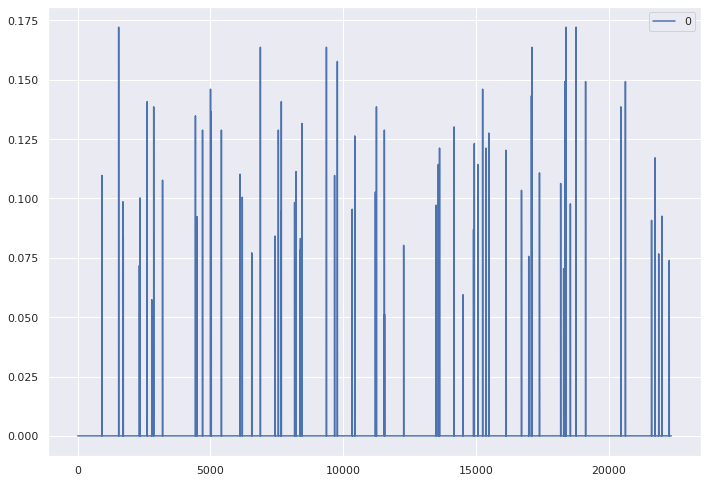

In [21]:
pd.DataFrame(vectorizer.transform(train_df['processed_text'][[0]]).toarray()).T.plot()

# Choosing the ML Model

### _MLP Regressor_

In [ ]:
#importing MLPRegressor as the ML model and adding data to it

from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(hidden_layer_sizes=(542,1024,512))
regr

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(542, 1024, 512), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
# Fitting the model
regr.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(542, 1024, 512), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
# Finding the score value for the validation set
regr.score(X_val, y_val)

0.46610487325883676

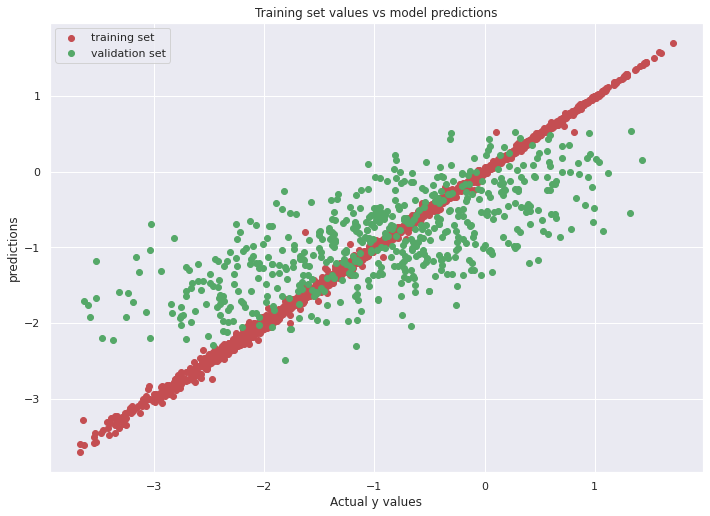

In [ ]:
train_pred_MLP = regr.predict(X_train)
val_pred_MLP = regr.predict(X_val)

plt.scatter(y_train, train_pred_MLP, color='r', label='training set')
plt.scatter(y_val, val_pred_MLP, color='g', label='validation set')

# Naming the x-axis, y-axis and the whole graph
plt.title("Training set values vs model predictions")
plt.xlabel("Actual y values")
plt.ylabel("predictions")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

This plot shows:

*   Very strong positive correlation between the training set predictions and actual values
*   Might be a possible case of overfitting
*   Data from the validation set is spread quite evenly

In [ ]:
# finding the mean squared error on the training and testing sets

mean_squared_error(y_train, train_pred_MLP)

0.0020450123152695203

In [ ]:
mean_squared_error(y_val, val_pred_MLP)

0.5590348314170883

### _SVM_

###### Linear Kernel

In [ ]:
from sklearn import svm

# fit the training dataset on the regressor
SVM = svm.SVR(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train,y_train)
# Find the score
SVM.score(X_val, y_val)

0.506625783105039

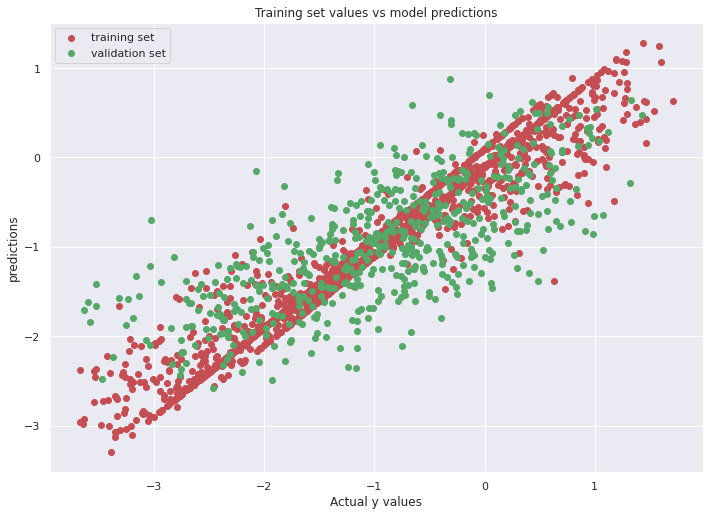

In [ ]:
train_pred_SVM = SVM.predict(X_train)
val_pred_SVM = SVM.predict(X_val)

plt.scatter(y_train, train_pred_SVM, color='r', label='training set')
plt.scatter(y_val, val_pred_SVM, color='g', label='validation set')

# Naming the x-axis, y-axis and the whole graph
plt.title("Training set values vs model predictions")
plt.xlabel("Actual y values")
plt.ylabel("predictions")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

This plot shows:

*   Strong positive correlation between the training set predictions and actual values. Not as strong as with the MLP regressor
*   Data from the validation set is spread somewhat evenly

In [ ]:
# Root mean squared error for training predicitions
mean_squared_error(y_train, train_pred_SVM)

0.08129040350311818

In [ ]:
# Root mean squared error for validation predictions
mean_squared_error(y_val, val_pred_SVM)

0.5166058994599684

The above score for the validation prediction is evidently lower than the root mean squared score for the MLP regressor model. It is also evident that the root mean squared error for the training set predictions is significantly higher than for the MLP regressor. Thus, it is likely that the set used to train the MLP regresasor may have been overfit, causing a higher root mean squared error for the test set. This makes the SVM a better regression model to use as compared to the MLP regressor

###### Poly Kernel

In [ ]:
# fit the training dataset on the regressor
SVM_poly = svm.SVR(C=1.0, kernel='poly', degree=3, gamma='auto')
SVM_poly.fit(X_train,y_train)
# Find the score
SVM_poly.score(X_val, y_val)

-0.0002748485421879554

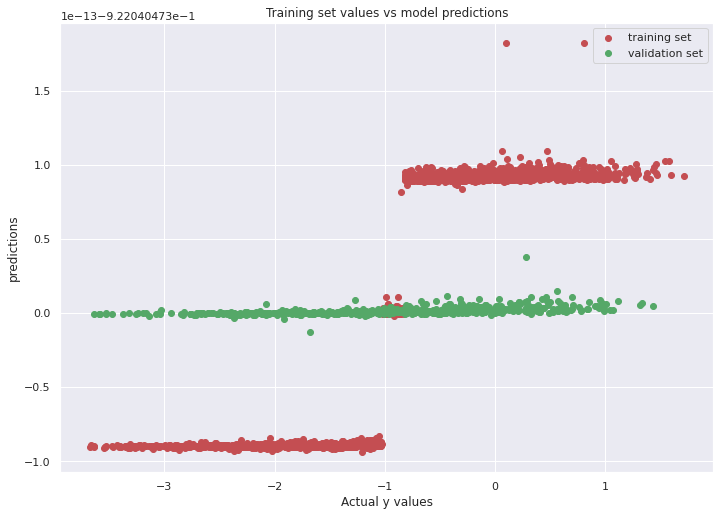

In [ ]:
train_pred_SVM_poly = SVM_poly.predict(X_train)
val_pred_SVM_poly = SVM_poly.predict(X_val)

plt.scatter(y_train, train_pred_SVM_poly, color='r', label='training set')
plt.scatter(y_val, val_pred_SVM_poly, color='g', label='validation set')

# Naming the x-axis, y-axis and the whole graph
plt.title("Training set values vs model predictions")
plt.xlabel("Actual y values")
plt.ylabel("predictions")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

In [ ]:
# Root mean squared error for training predicitions
mean_squared_error(y_train, train_pred_SVM_poly)

1.074781988928794

In [ ]:
# Root mean squared error for validation predictions
mean_squared_error(y_val, val_pred_SVM_poly)

1.0473751366467046

The poly kernel clearly does not work well for the data

###### RBF Kernel

In [ ]:
# fit the training dataset on the regressor
SVM_rbf = svm.SVR(C=1.0, kernel='rbf', degree=3, gamma='auto')
SVM_rbf.fit(X_train,y_train)
# Find the score
SVM_rbf.score(X_val, y_val)

0.0003311008026588569

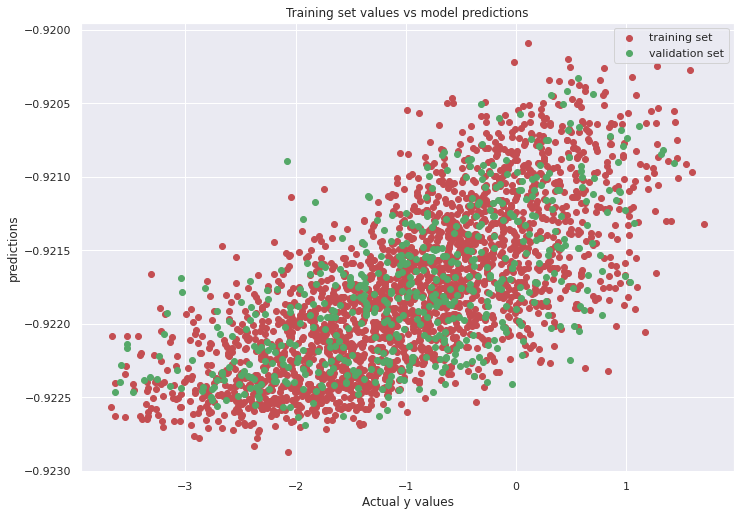

In [ ]:
train_pred_SVM_rbf = SVM_rbf.predict(X_train)
val_pred_SVM_rbf = SVM_rbf.predict(X_val)

plt.scatter(y_train, train_pred_SVM_rbf, color='r', label='training set')
plt.scatter(y_val, val_pred_SVM_rbf, color='g', label='validation set')

# Naming the x-axis, y-axis and the whole graph
plt.title("Training set values vs model predictions")
plt.xlabel("Actual y values")
plt.ylabel("predictions")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

In [ ]:
# Root mean squared error for training predicitions
mean_squared_error(y_train, train_pred_SVM_rbf)

1.0740119483463169

In [ ]:
# Root mean squared error for validation predictions
mean_squared_error(y_val, val_pred_SVM_rbf)

1.0467406547552678

Although better than with the poly kernel, the rbf kernel does not work well either

### _Random Forests Regressor_

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rndFRegr = RandomForestRegressor()

# Fitting the data to the ML model
rndFRegr.fit(X_train, y_train)

# Output Score
rndFRegr.score(X_val, y_val)

0.4323822498008122

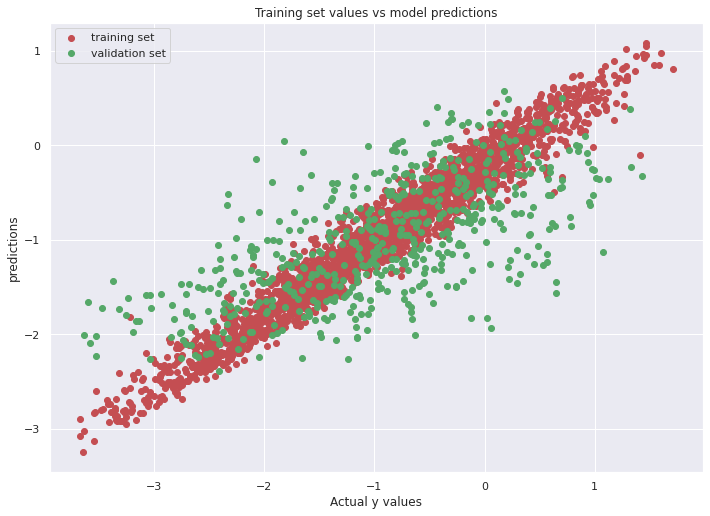

In [ ]:
train_pred_rndF = rndFRegr.predict(X_train)
val_pred_rndF = rndFRegr.predict(X_val)

plt.scatter(y_train, train_pred_rndF, color='r', label='training set')
plt.scatter(y_val, val_pred_rndF, color='g', label='validation set')

# Naming the x-axis, y-axis and the whole graph
plt.title("Training set values vs model predictions")
plt.xlabel("Actual y values")
plt.ylabel("predictions")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

This plot shows:

*   Very strong positive correlation between the training set predictions and actual values
*   Data from the validation set is not spread quite evenly

In [ ]:
# Root mean squared error for training predicitions
mean_squared_error(y_train, train_pred_rndF)

0.08458724096093435

In [ ]:
# Root mean squared error for validation predictions
mean_squared_error(y_val, val_pred_rndF)

0.5943453637211945

### _Ridge Regression_

In [22]:
from sklearn.linear_model import Ridge
ridgeRegr = Ridge()

# Fitting the data to the ML model
ridgeRegr.fit(X_train, y_train)

# Output Score
ridgeRegr.score(X_val, y_val)

0.502584127529541

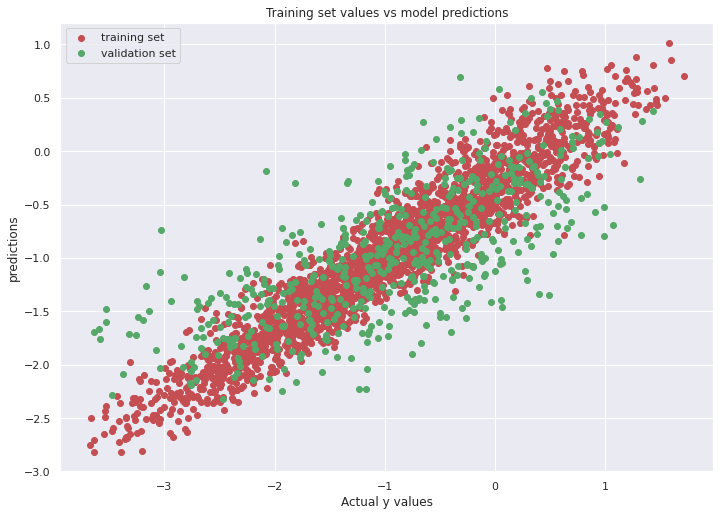

In [23]:
train_pred_ridge = ridgeRegr.predict(X_train)
val_pred_ridge = ridgeRegr.predict(X_val)

plt.scatter(y_train, train_pred_ridge, color='r', label='training set')
plt.scatter(y_val, val_pred_ridge, color='g', label='validation set')

# Naming the x-axis, y-axis and the whole graph
plt.title("Training set values vs model predictions")
plt.xlabel("Actual y values")
plt.ylabel("predictions")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

This plot shows:

*   Strong positive correlation between the training set predictions and actual values
*   Data from the validation set is spread relatively evenly

In [24]:
# Root mean squared error for training predicitions
mean_squared_error(y_train, train_pred_ridge)

0.16361117812899187

In [25]:
# Root mean squared error for validation predictions
mean_squared_error(y_val, val_pred_ridge)

0.520837865870836

**Overall, from all the models implemented, the model that will be used is the Ridge Regression ML model. Despite the RMSE value for Ridge and SVM models being alomost the same for predictions on the validation sets, the RMSE value for predictions on the training set using SVM was significantly lower indicating possible signs of overfitting. In addtion to that, the validation set predicitons are more evenly spread. Thus, the Ridge regression models was chosen**



# Fitting the model and preparing it for submission to the kaggle competition

In [26]:
ridgeRegr.fit(X,y)

Ridge()

In [27]:
X_test = vectorizer.transform(test_df['processed_text'])
test_pred = ridgeRegr.predict(X_test)
test_pred

array([-1.4918418 , -0.67487516, -0.84300518, -2.01025084, -1.3742401 ,
       -0.64910044, -0.06816597])

# Submission

In [28]:
final_predictions = pd.DataFrame()
final_predictions['id'] = test_df['id']
final_predictions['target'] = test_pred
final_predictions.to_csv('kaggle_submission.csv', index=False)

In [29]:
final_predictions

,id,target
0,c0f722661,-1.491842
1,f0953f0a5,-0.674875
2,0df072751,-0.843005
3,04caf4e0c,-2.010251
4,0e63f8bea,-1.374240
5,12537fe78,-0.649100
6,965e592c0,-0.068166


# Scraping the data from gutenberg

In [27]:
# Setting up the URL's for the request
URL = ['https://www.gutenberg.org/ebooks/search/?sort_order=downloads','https://www.gutenberg.org/ebooks/search/?sort_order=downloads&start_index=26', 'https://www.gutenberg.org/ebooks/search/?sort_order=downloads&start_index=51', 'https://www.gutenberg.org/ebooks/search/?sort_order=downloads&start_index=76']

# Indexes for the start of each page
indexes = [1, 26, 51, 76, 101]

# Setting up numpy array to store book titles
book_titles = []
book_id = []

for url in range(len(URL)):
  # Make the request for each of the pages
  req = requests.get(URL[url])
  books_soup = bs(req.text, 'html.parser')

  #Finding all <li> tags in that page with the class being booklink
  intermediate_step = books_soup.find_all('li', attrs={'class':'booklink'})

  #Looping through each of the book titles on that page
  for i in range(0,indexes[url + 1] - indexes[url]):
    
    # finding and appending book name to the list
    final_step_name = intermediate_step[i].find_all('span', attrs={'class':'title'})
    book_titles.append(final_step_name[0].text)
    
    # finding the book ids and appending those to the list
    final_step_id = intermediate_step[i].find_all('a', attrs={'class':'link'})
    
    # the urls containing the ids come in the form "/ebooks/1342" where 1342 is the id
    # Thus, the following step removes the "/ebooks/" part
    unprocessed_id = final_step_id[0].get('href')
    book_id.append(int(unprocessed_id[8:len(unprocessed_id)]))


print(book_titles)

['Pride and Prejudice', 'Frankenstein; Or, The Modern Prometheus', "Alice's Adventures in Wonderland", 'Beowulf: An Anglo-Saxon Epic Poem', 'The Adventures of Sherlock Holmes', 'Moby Dick; Or, The Whale', 'The Scarlet Letter', 'The Prince', 'The Yellow Wallpaper', 'The Picture of Dorian Gray', 'Metamorphosis', 'A Tale of Two Cities', 'The Great Gatsby', "A Doll's House : a play", 'A Modest Proposal\r', 'Dracula', 'The Strange Case of Dr. Jekyll and Mr. Hyde', 'Walden, and On The Duty Of Civil Disobedience', "Grimms' Fairy Tales", 'The Iliad', 'Jane Eyre: An Autobiography', 'Anthem', 'A Christmas Carol in Prose; Being a Ghost Story of Christmas', 'The Republic', 'The Adventures of Tom Sawyer, Complete', 'The Odyssey\r', 'Heart of Darkness', 'The Souls of Black Folk', 'Narrative of the Life of Frederick Douglass, an American Slave', 'The Happy Prince, and Other Tales', 'Narrative of the Captivity and Restoration of Mrs. Mary Rowlandson', 'Crime and Punishment', 'War and Peace', 'Adventur

In [28]:
print(book_id)

[1342, 84, 11, 16328, 1661, 2701, 25344, 1232, 1952, 174, 5200, 98, 64317, 2542, 1080, 345, 43, 205, 2591, 6130, 1260, 1250, 46, 1497, 74, 1727, 219, 408, 23, 902, 851, 2554, 2600, 76, 55, 1400, 844, 514, 160, 3207, 16, 4300, 45, 7370, 58585, 1184, 2814, 15399, 4980, 20203, 244, 996, 2852, 63256, 768, 36, 41, 120, 30254, 35, 203, 26184, 215, 158, 730, 135, 236, 829, 19942, 3600, 27827, 113, 5827, 42884, 7142, 2500, 147, 4517, 1934, 28054, 43453, 766, 8800, 10007, 2148, 42108, 103, 600, 1998, 140, 4363, 3296, 1399, 6133, 521, 863, 161, 3090, 11030, 10]


In [29]:
# Creating a dataframe for the list of books
books_df = pd.DataFrame({'book_id' : book_id, 'book_title' : book_titles})
books_df

,book_id,book_title
0,1342,Pride and Prejudice
1,84,"Frankenstein; Or, The Modern Prometheus"
2,11,Alice's Adventures in Wonderland
3,16328,Beowulf: An Anglo-Saxon Epic Poem
4,1661,The Adventures of Sherlock Holmes
...,...,...
95,863,The Mysterious Affair at Styles
96,161,Sense and Sensibility
97,3090,Complete Original Short Stories of Guy De Maup...
98,11030,"Incidents in the Life of a Slave Girl, Written..."


### _Getting the paragraphs from each book_

In [30]:
import statistics
# finding the length of each excerpt
myset = set()
for i in range(len(train_df['processed_text'])):
  words = train_df['processed_text'][i].split()
  myset.add(len(words))

print(statistics.median(myset))

69.5


In [31]:
# Approximately 70 words are within each paragraph in the exerpt
# We will use this to extract our paragraphs to feed to the ML model

def paragraphs(book_id):
  """
  This function extracts excerpts from paragraphs from a specified book

  Parameters
  ----------
  book_id (integer) - the book's id assigned to each book by gutenburg

  Returns
  ----------
  String containing the words that form each excerpt
  """
  #form the URL
  # Example : https://www.gutenberg.org/files/1342/1342-h/1342-h.htm
  URL_1 = "https://www.gutenberg.org/files/" + str(book_id) + "/" + str(book_id) + "-h/" + str(book_id) + "-h.htm"
  # Example: https://www.gutenberg.org/cache/epub/26184/pg26184.html
  URL_2 = "https://www.gutenberg.org/cache/epub/" + str(book_id) + "/pg" + str(book_id) + ".html"
  
  # Make the request for each of the pages
  if  requests.get(URL_1).status_code == 404:
    req = requests.get(URL_2)
  else:
    req = requests.get(URL_1)

  books_soup = bs(req.text, 'html.parser')

  # word set for each book
  excerpt_set = set()
  
  # Counter for while loop
  i = 0

  while len(excerpt_set) <= 70:
    if requests.get(URL_1).status_code == 404:
      # Finding all <p> tags in that page with the class being booklink
      intermediate_step = books_soup.find_all('p', attrs={'id':'id000' + str(i+30)})[0].text
      # Preprocessing the data
      excerpt = preprocess(intermediate_step).split()
      # Adding all words to a set
      for word in excerpt:
        excerpt_set.add(word)

    else:
      try:
        try:
          # Finding all <div> tags in that page with the class being chapter
          intermediate_step = books_soup.find_all('div', attrs={'class':'chapter'})
          # Finding the <p> tags inside
          final_step = intermediate_step[1].find_all('p')[i].text
          # Preprocessing the data
          excerpt = preprocess(final_step).split()
          # Adding all words to a set
          for word in excerpt:
            excerpt_set.add(word)
        except:
          # Finding all <div> tags in that page with the class being fit and id II
          intermediate_step = books_soup.find_all('div', attrs={'class':'fit', 'id': 'II'})
          # Finding the <div> tags inside with class l and starting from id 'L.II.1'
          final_step = intermediate_step[0].find_all('div', attrs={'class':'l', 'id': 'L.II.' + str(i+1)})[0].text
          # Preprocessing the data
          excerpt = preprocess(final_step).split()
          # Adding all words to a set
          for word in excerpt:
            excerpt_set.add(word)
      except:
        # Finding all <p> tags in that page with the class being booklink
        intermediate_step = books_soup.find_all('p')[i].text
        # Preprocessing the data
        excerpt = preprocess(intermediate_step).split()
        # Adding all words to a set
        for word in excerpt:
          excerpt_set.add(word)


    i += 1
  return ' '.join(excerpt_set)

#Testing the function
print(paragraphs(1080))



publick state honest helpless street cabbin child time therefore pretender alms method grievance stroling passenger could four heel turn every leave beggar sustenance crowded travel native set additional whoever commonwealth mother preserver door present able statue six deplorable sound fair thief kingdom making want useful walk great arm spain easy barbadoes livelihood father town country rag well either female would sell dear beg number party importuning road prodigious deserve member employ forced work cheap find object sex agreed melancholy instead three see think nation grow infant followed fight back frequently


In [32]:
# Applying the function to the training set
books_df['excerpt'] = books_df['book_id'].apply(lambda x: paragraphs(x))
books_df

KeyboardInterrupt: 

Three of the book titles have a "\r" at the end. This would cause problems when converting the dataframe to .csv and also when we try to vectorise it.
Thus, we will now remove it

In [ ]:
books_df.loc[books_df['book_id'] == 1080, :]

,book_id,book_title,excerpt
15,1080,A Modest Proposal\r,spain door dear great number infant object use...


In [ ]:
books_df.loc[books_df['book_id'] == 1727, :]

,book_id,book_title,excerpt
25,1727,The Odyssey\r,whole withdraw first reach lived entirely usef...


In [ ]:
books_df.loc[books_df['book_id'] == 27827, :]

,book_id,book_title,excerpt
68,27827,The Kama Sutra of Vatsyayana\r,reprint private publication view remark benare...


In [ ]:
temp_df = books_df.head(16)
temp_df

,book_id,book_title,excerpt
0,1342,Pride and Prejudice,earliest believe serving kitty visit addressed...
1,84,"Frankenstein; Or, The Modern Prometheus",life collecting dear participate brother impat...
2,11,Alice's Adventures in Wonderland,getting door manage dear sure great new direct...
3,16328,Beowulf: An Anglo-Saxon Epic Poem,land season beloved lifetime kinsman governed ...
4,1661,The Adventures of Sherlock Holmes,life bizarre rose door dear withdraw deep sher...
5,2701,"Moby Dick; Or, The Whale",counterpane going street knight cabin nantucke...
6,25344,The Scarlet Letter,genuine life whatever feature purpose undertak...
7,1232,The Prince,parent life son returned literary public week ...
8,1952,The Yellow Wallpaper,mere marriage course house declare cheaply liv...
9,174,The Picture of Dorian Gray,stillness necessarily rose door bird divan cur...


In [ ]:
# Removing "\r"
books_df['book_title'] = books_df['book_title'].str.replace('\r','')
books_df

,book_id,book_title,excerpt
0,1342,Pride and Prejudice,earliest believe serving kitty visit addressed...
1,84,"Frankenstein; Or, The Modern Prometheus",life collecting dear participate brother impat...
2,11,Alice's Adventures in Wonderland,getting door manage dear sure great new direct...
3,16328,Beowulf: An Anglo-Saxon Epic Poem,land season beloved lifetime kinsman governed ...
4,1661,The Adventures of Sherlock Holmes,life bizarre rose door dear withdraw deep sher...
...,...,...,...
95,161,Sense and Sensibility,visitor invitation dear sanguine must john beg...
96,521,The Life and Adventures of Robinson Crusoe,whatever great first bound evil ship carried p...
97,3090,Complete Original Short Stories of Guy De Maup...,milon marriage lieutenant duel gift colonel do...
98,10,The King James Version of the Bible,land void upon life darkness firmament season ...


In [ ]:
books_df.loc[books_df['book_id'] == 1080, :]

,book_id,book_title,excerpt
15,1080,A Modest Proposal,spain door dear great number infant object use...


In [ ]:
books_df.loc[books_df['book_id'] == 1727, :]

,book_id,book_title,excerpt
25,1727,The Odyssey,whole withdraw first reach lived entirely usef...


In [ ]:
books_df.loc[books_df['book_id'] == 27827, :]

,book_id,book_title,excerpt
68,27827,The Kama Sutra of Vatsyayana,reprint private publication view remark benare...


In [ ]:
# Fitting to the model
X_books = vectorizer.transform(books_df['excerpt'])
books_df['target'] = ridgeRegr.predict(X_books)
books_df

,book_id,book_title,excerpt,target
0,1342,Pride and Prejudice,earliest believe serving kitty visit addressed...,-0.779249
1,84,"Frankenstein; Or, The Modern Prometheus",life collecting dear participate brother impat...,-1.476943
2,11,Alice's Adventures in Wonderland,getting door manage dear sure great new direct...,-0.908423
3,16328,Beowulf: An Anglo-Saxon Epic Poem,land season beloved lifetime kinsman governed ...,-1.700288
4,1661,The Adventures of Sherlock Holmes,life bizarre rose door dear withdraw deep sher...,-0.802613
...,...,...,...,...
95,161,Sense and Sensibility,visitor invitation dear sanguine must john beg...,-1.467426
96,521,The Life and Adventures of Robinson Crusoe,whatever great first bound evil ship carried p...,-1.489355
97,3090,Complete Original Short Stories of Guy De Maup...,milon marriage lieutenant duel gift colonel do...,-0.964866
98,10,The King James Version of the Bible,land void upon life darkness firmament season ...,-1.151548


In [ ]:
# Converting to csv
books_df.to_csv('books.csv', index=False)

# Saving model as in a JSON format

In [114]:
import joblib

joblib.dump(ridgeRegr, 'model.pkl')

['model.pkl']

# Model Deployment

In [31]:
# Loading the workspace
from azureml.core import Workspace
ws = Workspace.from_config(path = "config.json")
print(ws.name, ws.resource_group, ws.location, ws.subscription_id, sep='\n')

booksRidge
MSA_submission_2021
eastus2
18d16622-401e-44fe-9020-12892d657ed3


In [95]:
from azureml.core.model import Model

# Register model
model = Model.register(ws, model_name = "booksRidge", model_path = "model.pkl")

print('Name:', model.name)
print('Version:', model.version)

Registering model booksRidge
Name: booksRidge
Version: 24


In [99]:
from azureml.core import Environment
from azureml.core.conda_dependencies import CondaDependencies
from azureml.core.model import InferenceConfig

# 2. Create environment 
env = Environment(name = "ridgenv")
conda_dep = CondaDependencies()
conda_dep.add_conda_package("numpy")
conda_dep.add_conda_package("joblib")
conda_dep.add_pip_package("json5")
conda_dep.add_conda_package("nltk")
conda_dep.add_conda_package("pandas")
conda_dep.add_conda_package("scikit-learn")
conda_dep.add_pip_package("azureml-defaults")
env.python.conda_dependencies = conda_dep

dummy_inference_config = InferenceConfig(
    environment = env,
    entry_script = "echo_score.py",
)

In [100]:
from azureml.core.webservice import AciWebservice
# NOTE: You may need more CPU or memeory depending on what kinds of model you end up using
aci_config = AciWebservice.deploy_configuration(cpu_cores = 1, memory_gb = 1)
service = Model.deploy(
    ws,
    "ridgenv",
    [model],
    dummy_inference_config,
    aci_config,
    overwrite = True,
)
service.wait_for_deployment(show_output = True)

Tips: You can try get_logs(): https://aka.ms/debugimage#dockerlog or local deployment: https://aka.ms/debugimage#debug-locally to debug if deployment takes longer than 10 minutes.
Running
2021-09-23 21:47:13+12:00 Creating Container Registry if not exists.
2021-09-23 21:47:13+12:00 Registering the environment.
2021-09-23 21:47:15+12:00 Use the existing image.
2021-09-23 21:47:16+12:00 Generating deployment configuration.
2021-09-23 21:47:16+12:00 Submitting deployment to compute.
2021-09-23 21:47:23+12:00 Checking the status of deployment ridgenv..
2021-09-23 21:49:15+12:00 Checking the status of inference endpoint ridgenv.
Succeeded
ACI service creation operation finished, operation "Succeeded"


In [28]:
service.get_logs()